# Classes and objects in Python.

In this lab, you will learn how to create classes and objects in Python. This will be crucial for understanding the interface of data-oriented Python libraries we will be using later, such as `pandas`, `numpy`, and `scikit-learn`. You will also learn how to use the Python `random` module to simulate random events. We will create classes that represent simple games and random processes.

---

## Quick introduction to the Python `random` module

The Python standard library includes a module called `random` that provides functions for generating pseudorandom numbers. To complete the exercises in this notebook, you may want to learn the following functions:

In [1]:
import random

random.random() # returns a random float between 0 and 1
print('The output of random.random() is:', random.random())

random.randint(0, 100) # returns a random integer between 0 and 100
print('The output of random.randint(0, 100) is:', random.randint(0, 100))

The output of random.random() is: 0.5373903734627434
The output of random.randint(0, 100) is: 5


In [2]:
movies = [
    'Taxi Driver',
    'Cars 3',
    'How High',
    'The Seventh Seal',
    'Mean Girls',
]

random_movie = random.choices(movies, k=1) # returns k random elements from the list (as a list)
print('Tonight we will watch', random_movie)

Tonight we will watch ['How High']


In [3]:
movie_preferences = {
    'Taxi Driver': 0.1,
    'Cars 3': 0.4,
    'How High': 0.2,
    'The Seventh Seal': 0,
    'Mean Girls': 0.3 
}

movies = list(movie_preferences.keys())
probabilities = list(movie_preferences.values())

random.choices(movies, probabilities, k=1) # returns k random elements from the list based on the probabilities given in a separate list
print('Eww, I would rather watch', random.choices(movies, probabilities))

Eww, I would rather watch ['Cars 3']


## Exercise: Fair dice

1. Implement a class called `Die` that represents a fair six-sided die. The class should have the methods:
    * `roll` that simulates rolling the die and returns the result as an **integer.**
    * `roll_dice` that takes an argument `n`, simulates rolling $n$ identical dice and **returns a list of $n$ integers.**

In [4]:
class Die:
    
    def roll(self):
        return random.randint(1,6)
    
    def roll_dice(self, n):
        value_list = []
        for i in range(n):
            value_list.append(self.roll())
        return value_list

In [5]:
# test your implementation

die = Die()
print('Rolling a die:', die.roll())
print('Rolling 5 dice:', die.roll_dice(5))

Rolling a die: 6
Rolling 5 dice: [1, 5, 3, 1, 1]


## Exercise: Unfair dice

Implement a class representing an unfair die (one that does not have an equal probability of landing on each of its sides). **The probabilities of rolling each face should be set by the user when creating a die object** by passing a parameter `probs`, a list of six positive floats summing to one.
   
You can create the `__init__` method to take the `probs` parameter and save it to an **attribute**. The `__init__` method, known as a **constructor**, is called only once when an object is created. It is a good place to set the initial state of the object, such as the probabilities of rolling each face of the die.

1. Implement a class called `UnfairDie` that represents an unfair six-sided die. The class will be very similar to the `Die` class from the previous exercise, so you can use it as a starting point. It should include all the methods from the `Die` class, but the `roll` method should now return a face of the die based on the probabilities given in the `probs` parameter.

In [24]:
class UnfairDie():
    def __init__(self, probs = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]):
        self.probs = probs
        if round(sum(self.probs),2) != 1:
            raise ValueError("Probs must sum to 1")
        self.values = [1,2,3,4,5,6]

    def roll(self):
        return random.choices(self.values, self.probs, k=1)

    def roll_dice(self, n):
        value_list = []
        for i in range(n):
            value_list.append(self.roll())
        return value_list
        

In [7]:
# test your implementation
probab = [1/12,2/12,1/12,1/12,1/12,1/2]
die = UnfairDie(probab)
print('Rolling a die:', die.roll())
print('Rolling 5 dice:', die.roll_dice(5))

Rolling a die: [2]
Rolling 5 dice: [[4], [5], [6], [2], [6]]


## Rewriting the Die class with inheritance

In the previous exercises, you implemented the `Die` class and the `UnfairDie` class. The `UnfairDie` class is very similar to the `Die` class, but includes the `__init__` method and is a more general version of the `Die` class. This may be a good example of when to use **inheritance** in object-oriented programming.

Inheritance is a mechanism in which one class acquires the attributes and methods of another class. The class that inherits the properties of another class is called a **subclass** or **derived class**, and the class whose properties are inherited is called a **superclass** or **base class**.

In Python, you can inherit from a class by passing the superclass as an argument to the class definition. We will create a new class called `Die` that inherits from the `UnfairDie` class. This way, we do not have to reimplement the `roll` and `roll_dice` methods, as they are already implemented in the `UnfairDie` class. **Remember that if you implement a method in a subclass that already exists in the superclass, the new method will override the old one.**

**The main advantage of inheritance is that it allows us to reuse the code from the superclass and avoid code duplication.** For example, if we were to add a new method to the `UnfairDie` class, the `Die` class would automatically inherit this method, and we would not have to touch the `Die` class at all.

In a subclass, we can call the constructor of the superclass using the `super()` function. For example, in the case of a fair die, we can call the constructor of the `UnfairDie` class with equal probabilities for each face.



In [8]:
class Die(UnfairDie):
    def __init__(self):
        super().__init__(probs=[1/6, 1/6, 1/6, 1/6, 1/6, 1/6]) # calling the constructor of the superclass, passing equal probabilities for each face
        
# checking if the Die class still works
die = Die()
print('Rolling a die:', die.roll())
print('Rolling 5 dice:', die.roll_dice(5))

Rolling a die: [5]
Rolling 5 dice: [[3], [2], [3], [3], [1]]


## Exercise: Entropy

Entropy is a measure of **uncertainity** or **randomness** in a random variable. 
You may have already heard about entropy in the context of thermodynamics, and if you did, you may see how those are related!
The entropy of a discrete random variable $X$ with probability distribution $p(x)$ is defined as:
$$H(X) = -\sum_{x} p(x) \log_2 p(x)$$
Entropy is a **weighted average of the information content** of each possible value of $X$, where the weight is the **probability** of that value.
The formula can also be written in a way which conveys the intuition behind it more clearly:
$$H(X) = \sum_{x} p(x) * \log_2 \frac{1}{p(x)}$$

### Let's break it down:

The term: $$\log_2 \frac{1}{p(x)}$$ is the **information content** or **surprisal** of the value $x$. For **high probability events** (such as the sun rising tomorrow) the surprisal is **low** (we get no new information about the system by observing the exact same sunrise for the 100th time), with $\log_2 \frac{1}{p(x)} = 0$ when $p(x) = 1$. For **low probability events**, such as your homework assignment being published in Nature, the surprisal is **high**, and $\log_2 \frac{1}{p(x)}$ goes to infinity as $p(x)\to 0$. The graph below illustrates how the information content of an event $x$ changes for different values of $p(x)$.

<center>
<img src="imgs/surprisal.png" width=400>
</center>
<br/><br/>

Now, entropy is the **average surprisal** of the random variable weighted by the probability of event $x$, thus in the formula it is multiplied by $p(x)$. 

If you do not immediately see how this relates to the concept of a weighted average, note that $p(x) \le 1$ and $\sum_{x}{}{p(x)} = 1$. 

Hopefully, you can see that the formula for entropy satisfies some of our expectations when it comes to measuring surprisal of a random event.
  
Let's take a look at an example. The entropy of a fair coin, where $p(\text{heads})=0.5$ and $p(\text{tails})=0.5$, is 1 bit:
$$H(\text{coin}) = p(\text{heads}) \log_2\frac{1}{p(\text{heads})} + p(\text{tails}) \log_2\frac{1}{p(\text{tails})}$$
$$= 0.5*\log_2\frac{1}{0.5} + 0.5*\log_2\frac{1}{0.5} = 1$$
while a coin that always lands heads has an entropy of 0 bits:
$$H(\text{coin}) = 1*\log_2\frac{1}{1} = 0$$
<br/>

1. Implement a method called `entropy` that calculates and returns the entropy of a die to the `UnfairDie` class from the previous exercise. How does the entropy of a fair die compare to the entropy of an unfair die with the probabilities $[0.1, 0.1, 0.1, 0.25, 0.15, 0.3]$? **Be sure to return a valid entropy value even if some of the probabilities are zero.**

In [31]:
# your code here
probab = [1/6,1/6,1/6,1/6,1/6,1/6]
import numpy as np
def entropy(UnfairDie):
    entsum = 0
    for prob in UnfairDie.probs:
        if prob != 0:
            entsum += prob * np.log2(1/prob)
    return entsum
print(entropy(UnfairDie(probab)))

2.584962500721156


## Exercise: Plotting averages of dice rolls

1. Create a function called `get_average`. The function should take a `Die` (or `UnfairDie`) object and a number of dice to roll $n$ as arguments. The function should return the mean result of rolling $n$ dice.

2. Create a function called `get_n_averages`. The function should take a `Die` (or `UnfairDie`) object, a number of dice to roll $n$, and the number of times to repeat the experiment $k$. The function should roll $n$ dice $k$ times and return a list of $k$ mean results.

3. Plot a histogram of the results of rolling $n = 10$ fair dice $k = 50$, $1000$ and $10 000$ times. The function `plot_means` which plots the histogram from a list of numbers is already implemented by me, and can be used out of the box. **You will learn how to prepare plots like this with seaborn and pyplot during the next labs**. What shape does this distribution converge to as the number of trials increases? Conduct the same experiment for unfair dice with probabilities $[0.1, 0.1, 0.1, 0.25, 0.15, 0.3]$ and try to draw some conclusions.

In [41]:
def get_average(UnfairDie, n):
    random_roll = 0
    for i in range(n):
        random_roll += UnfairDie.roll()[0]
    return random_roll/n
print(get_average(UnfairDie(probab), 5))

3.6


In [44]:
def get_n_averages(UnfairDie, n, k):
    random_roll_list = []
    for j in range(k):
        random_roll_list.append(get_average(UnfairDie, n))
    return random_roll_list
print(get_n_averages(UnfairDie(probab), 5, 5))

[3.8, 3.0, 4.6, 3.0, 4.2]


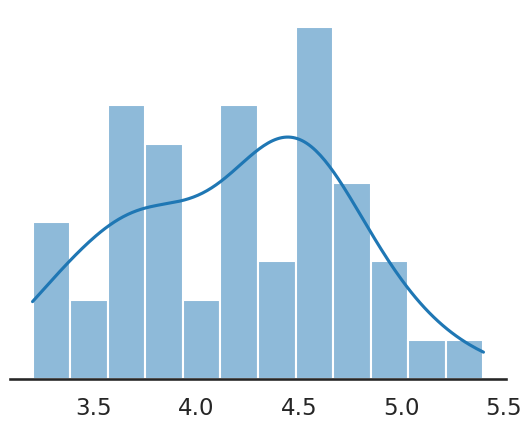

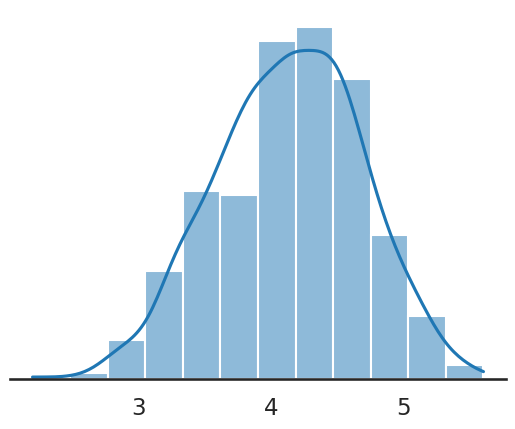

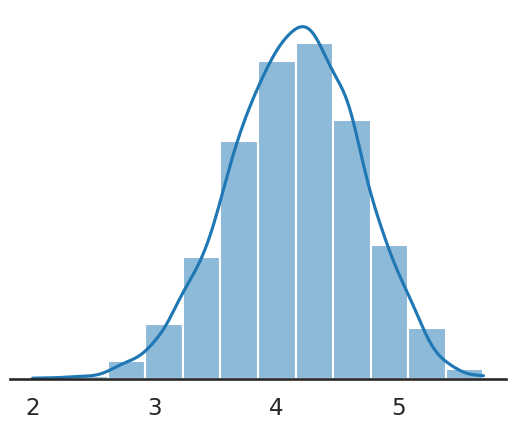

In [50]:
from helpers.plotting import plot_hist
import warnings # This library is used to ignore warnings, don't worry about it for now
warnings.filterwarnings('ignore')
probab = [0.1,0.1,0.1,0.25,0.15,0.3]
results50 = get_n_averages(UnfairDie(probab), 10, 50)
plot_hist(results50)
results1000 = get_n_averages(UnfairDie(probab), 10, 1000)
plot_hist(results1000)
results10000 = get_n_averages(UnfairDie(probab), 10, 10000)
plot_hist(results10000)

## Excercise: Pachinko

Pachinko is a Japanese gambling game played on a vertical board. The board has pegs protruding from the surface and the player has to drop a ball from the top. The ball bounces off the pegs and can land in one of specially designated pockets. The pockets have different values and the prize is determined by the pocket in which the ball lands.

<center>
    <p float="left">
        <img src="imgs/pachinko1.jpg", width=300>
        <img src="imgs/pachinko.png", width=450>
    </p>
</center>

The figure above shows an actual pachinko machine (left) and a simplified version of a pachinko board (right). **Assume the ball has an equal chance of bouncing either left or right off each peg.**

One can simulate the results of such a game in many ways. One example is by assigning a value of 0 to each left bounce and 1 to each right bounce. As the ball falls through $n$ rows, its final position (bin index) is determined by the sum of the values in each row.

1. Create a class called `Pachinko` that represents a simplified pachinko board of $k$ rows. The class should have a method called `drop_balls` that simulates dropping $n$ balls through the board and returns the list of $n$ integers, corresponding to the final position (bin index) of each ball.
2. Create a function called `plot_pachinko`. It should take a Pachinko object and the number of balls $n$ as arguments. The function should simulate dropping $n$ balls through the board and return a histogram of the distribution of balls in all bins (you can use the `plot_hist` function from the previous exercise to return the histogram).
3. Plot the histogram of the results of dropping 1000 balls through a pachinko board with $k=5, 10, 20$ rows. What shape does this distribution converge to as the number of rows increases?

   *What exactly does this experiment have in common with means of multiple dice rolls?*
   
4. You encounter a 10-row pachinko machine. One game (equivalent of dropping one ball) costs you 10 yen. If the ball lands in either the first or last bin, you win 2500 yen. You can play as many times as you wish. Will this machine make the casino go bankrupt? Conduct a simulation to verify your prediction.

### This exercise is worth one extra point

In [77]:
class Pachinko:
    def __init__(self, k):
        self.rows = k
    
    def drop_balls(self, n):
        pachinko_list = []
        for i in range(n):
            bin_value = 0
            for j in range(self.rows):
                bin_value += random.randint(0,1)
            pachinko_list.append(bin_value)
        return pachinko_list
    

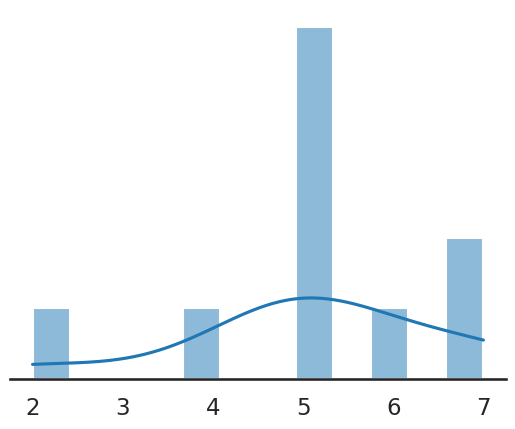

In [78]:
from helpers.plotting import plot_hist
def plot_pachinko(Pachinko, n):
    values = Pachinko.drop_balls(n)
    return plot_hist(values)
plot_pachinko(Pachinko(10), 10)

## Python dunder methods

We have already encountered some special methods in Python, such as `__init__(self, args)`, which is called only once when an object is created. These methods are called dunder methods (short for *double underscore*). They are used to define how objects of a class behave when they are used in conjunction with built-in Python functions. 

For example, the `__str__(self)` method is called when an object is passed to the `print` function. If you want to define how your object should be represented as a string, you can implement this method in your class. Here is an example:

In [79]:
# Example of using __str__()

class Cow:
    def __init__(self, name):
        self.name = name # Setting the name of the cow

    def __str__(self):
        cow_art = (
        rf"""
        This is a cow named {self.name}:
        ^__^
        (oo)\_______
        (__)\       )\/\
            ||----w |
            ||     ||
        """
        )
        return cow_art.strip() # The strip() method is for aesthetic purposes
    
cow = Cow('Angelica')

# The print function calls the __str__() method!
print(cow)

This is a cow named Angelica:
        ^__^
        (oo)\_______
        (__)\       )\/\
            ||----w |
            ||     ||


Dunder methods are a powerful tool in Python that allows you to use your custom classes in any code that was prepared to work with built-in Python objects. You just have to implement the right dunder methods in your class.

Other useful dunder methods:
- `__call__(self)`: makes an object callable. It is executed when the object is called as a function.
- `__add__(self, other)`: called by the `+` operator. It should return the sum of two objects (*whatever that means for your particular class*).
- `__mul__(self, other)`: called by the `*` operator. It should return the product of two objects).
- `__len__(self)`: called by the `len` function. It should return the length of the object).
- `__eq__(self, other)`: called by the `==` operator. It should return `True` if two objects are equal.
- `__getitem__(self, key)`: called to get an item from the object using square brackets. It should return the item at the given key (*useful if your class is a data-related*).

There are many other dunder methods that you can implement in your classes. You can find a list of them [here](https://docs.python.org/3/reference/datamodel.html#special-method-names).